In [1]:
!pip install sqlalchemy


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\yuvra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [24]:
!pip install ast

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      Traceback (most recent call last):
        File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(c

In [18]:
!pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\yuvra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install pymysql


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\yuvra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [103]:
import pandas as pd
import likesucksbutthisdoesnt as ls
import matplotlib.pyplot as plt

In [104]:
movies_path = r'C:\Users\yuvra\OneDrive\Desktop\Cleaning\movies.csv'
movies_df = pd.read_csv(movies_path, encoding = 'cp1252')

In [105]:
movies_df.columns = movies_df.columns.str.title()
movies_df['One-Line'] = movies_df['One-Line'].str.title()
print(movies_df)

                                   Movies         Year  \
0                           Blood Red Sky        -2021   
1     Masters of the Universe: Revelation     (2021– )   
2                        The Walking Dead  (2010–2022)   
3                          Rick and Morty     (2013– )   
4                         Army of Thieves        -2021   
...                                   ...          ...   
9994                       The Imperfects     (2021– )   
9995                               Arcane     (2021– )   
9996                    Heart of Invictus     (2022– )   
9997                       The Imperfects     (2021– )   
9998                       The Imperfects     (2021– )   

                                           Genre  Rating  \
0         \nAction, Horror, Thriller                 6.1   
1     \nAnimation, Action, Adventure                 5.0   
2          \nDrama, Horror, Thriller                 8.2   
3     \nAnimation, Adventure, Comedy                 9.2   
4  

In [106]:
movies_df['Year'] = movies_df['Year'].astype(str)  # ensure it's string


In [107]:
import re

def year(val):
    pattern = r'\b\d{4}\b'
    
    if re.findall(pattern, val):
        a = re.findall(pattern, str(val))
        
    else:
        a = 'None'
    return a     
movies_df['New'] = movies_df['Year'].apply(year)

In [108]:
print((movies_df['New'] == 'None').sum())

748


In [109]:
movies_df = movies_df.drop_duplicates(subset = ['Movies', 'Year', 'Rating'], keep = 'first')

In [110]:
print((movies_df['Rating'].isnull().sum()/10000)*100)

10.489999999999998


In [111]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8336 entries, 0 to 9996
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movies    8336 non-null   object 
 1   Year      8336 non-null   object 
 2   Genre     8258 non-null   object 
 3   Rating    7287 non-null   float64
 4   One-Line  8336 non-null   object 
 5   Stars     8336 non-null   object 
 6   Votes     7287 non-null   object 
 7   Runtime   6340 non-null   float64
 8   Gross     460 non-null    object 
 9   New       8336 non-null   object 
dtypes: float64(2), object(8)
memory usage: 716.4+ KB


In [112]:
def clean_year(value):
    value = str(value).strip() #strip remove any weird spaces
    value = value.replace('(', '').replace(')', "")
    value = value.replace('–', '-').replace('—', '-')
    
    if value.startswith('-') and value[1:].isdigit(): #checks the starting #value[1:].isdigit(): checks if 2nd character is a digit or not
        return f"unknown - {value[1:]}"
    
    elif value.endswith('-') and value[:1].isdigit(): #checks the ending 
        return (value[:1] - 'present') 
    
    elif '-' in value: #check for '-' present anywhere else
        parts = value.split('-')
        if len(parts) == 2:
            start = parts[0].strip() or 'unknown'
            end = parts[1].strip() or 'present'
            return (start, end)
    
    elif value.isdigit():
        return f"unknown - {value}"
           
    
    return (None, None)

movies_df[['start', 'end']] = movies_df['Year'].apply(lambda x: pd.Series(clean_year(x)))    


In [113]:
movies_df['Year'] = movies_df['Year'].str.replace('unknown', 'Unknown')


In [114]:
print(movies_df['Movies'].str.strip().str.lower())


0                             blood red sky
1       masters of the universe: revelation
2                          the walking dead
3                            rick and morty
4                           army of thieves
                       ...                 
9975                               ultraman
9979                      never have i ever
9993                              totenfrau
9995                                 arcane
9996                      heart of invictus
Name: Movies, Length: 8336, dtype: object


In [115]:
print(movies_df['Movies'].nunique())
movies_df = movies_df.drop_duplicates(subset='Movies', keep='first')
print(movies_df.shape[0])


6816
6816


In [116]:
movies_df['Rating'] = movies_df['Rating'].fillna(movies_df['Rating'].mean())


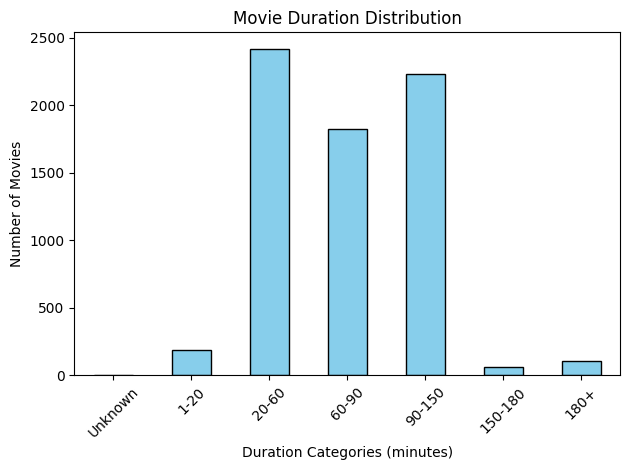

In [142]:
movies_df['Runtime'] = pd.to_numeric(movies_df['Runtime'])

def categorize_runtime(x):
    if pd.isna(x):
        return 'Unknown'
    if x<=20:
        return '1-20'
    if x <=60:
        return '20-60'
    elif x <= 90:
        return '60-90'
    elif x <= 150:
        return '90-150'
    elif x <= 180:
        return '150-180'
    else:
        return '180+'
    
movies_df['Duration Category'] = movies_df['Runtime'].apply(categorize_runtime)

category_counts = movies_df['Duration Category'].value_counts().reindex(
    ['Unknown', '1-20', '20-60', '60-90', '90-150', '150-180', '180+'], fill_value = 0)

category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration Categories (minutes)')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


In [124]:
def classify_type(val):
    if not val or str(val).strip() in ['[]', "['']", '']:
        return 'Others'
    
    val = str(val).lower()
    if 'director' in val:
        return 'Movie'
    return 'Series'

movies_df['Type'] = movies_df['Stars'].apply(classify_type)


In [128]:
def convert_runtime(runtime):
    # Extract numeric part (e.g., "45 min" → 45)
    if pd.isna(runtime):
        return None
    match = re.search(r'\d+', str(runtime))
    return int(match.group()) if match else None

# Step 1: Convert runtime to integer minutes
movies_df['Runtime_mins'] = movies_df['Runtime'].apply(convert_runtime)

# Step 2: Replace 'Movie' with 'Short-movie' where Runtime <= 40
movies_df.loc[
    (movies_df['Type'] == 'Movie') & (movies_df['Runtime_mins'] <= 40),
    'Type'
] = 'Short-movie'
movies_df


,Movies,Year,Genre,Rating,One-Line,Stars,Votes,Runtime,Gross,New,start,end,Duration Category,Type,Runtime_mins
0,Blood Red Sky,-2021,"\nAction, Horror, Thriller",6.100000,\nA Woman With A Mysterious Illness Is Forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,[2021],None,2021,90-150,Movie,121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.000000,\nThe War For Eternia Begins Again In What May...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,[2021],2021,present,20-60,Animation,25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.200000,\nSheriff Deputy Rick Grimes Wakes Up From A C...,"\n \n Stars:\nAndrew Lincoln, \n...","8,85,805",44.0,NaN,"[2010, 2022]",2010,2022,20-60,Series,44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.200000,\nAn Animated Series That Follows The Exploits...,"\n \n Stars:\nJustin Roiland, \n...","4,14,849",23.0,NaN,[2013],2013,present,20-60,Animation,23.0
4,Army of Thieves,-2021,"\nAction, Crime, Horror",6.635529,"\nA Prequel, Set Before The Events Of Army Of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,[2021],None,2021,Unknown,Movie,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9935,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",6.635529,\nAdd A Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN,[2021],2021,present,Unknown,Series,NaN
9964,AlRawabi School for Girls,-2021,\nDrama,6.635529,\nAdd A Plot\n,\n Director:\nTima Shomali\n| \n Stars:\...,NaN,NaN,NaN,[2021],None,2021,Unknown,Movie,NaN
9993,Totenfrau,(2022– ),"\nDrama, Thriller",6.635529,\nAdd A Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN,[2022],2022,present,Unknown,Movie,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",6.635529,\nAdd A Plot\n,\n,NaN,NaN,NaN,[2021],2021,present,Unknown,Animation,NaN


In [129]:
movies_df.drop(columns='Runtime_mins', inplace=True)


In [134]:
print(sum(movies_df['Runtime'].isna()))

1511


In [135]:
# Step 1: Convert Runtime to numeric (in minutes) if not already
def extract_minutes(runtime):
    if pd.isna(runtime):
        return None
    match = re.search(r'\d+', str(runtime))
    return int(match.group()) if match else None

movies_df['Runtime_mins'] = movies_df['Runtime'].apply(extract_minutes)

# Step 2: Fill nulls in Runtime_mins using average by Type
movies_df['Runtime_mins'] = movies_df.groupby('Type')['Runtime_mins'].transform(
    lambda x: x.fillna(round(x.mean()))
)

# (Optional) Step 3: Replace original Runtime with filled values
movies_df['Runtime'] = movies_df['Runtime_mins'].astype(int).astype(str) + ' min'

# (Optional) Drop temporary column
movies_df.drop(columns='Runtime_mins', inplace=True)


In [141]:
# Round Rating to 1 decimal place
movies_df['Rating'] = movies_df['Rating'].round(1)

# Extract minutes from Runtime and remove decimals
def clean_runtime(runtime):
    if pd.isna(runtime):
        return None
    match = re.search(r'\d+', str(runtime))
    return str(int(match.group())) if match else None

movies_df['Runtime'] = movies_df['Runtime'].apply(clean_runtime)


In [125]:
import re

def classify_type_from_genre(genre):
    genre = str(genre).lower()
    
    if 'short' in genre:
        if 'animation' in genre:
            return 'Short-Animation'
        return 'Short-movie'
    
    elif 'documentary' in genre:
        return 'Documentary'
    
    elif 'animation' in genre:
        return 'Animation'
    
    elif re.search(r'tv[\s\-]?show', genre):
        return 'TV-show'
    
    elif re.search(r'reality[\s\-]?tv|reality', genre):
        return 'Reality Show'
    
    return None  # leave it unchanged if none matched

# Apply logic and update Type column only if match found
movies_df['Type'] = movies_df.apply(
    lambda row: classify_type_from_genre(row['Genre']) if classify_type_from_genre(row['Genre']) else row['Type'],
    axis=1
)


In [101]:
def fill_from_new(row):
    start, end, new_vals = row['start'], row['end'], row['New']
    
    if pd.isna(start) and pd.isna(end):
        if isinstance(new_vals, list):
            if len(new_vals) == 2:
                return pd.Series([new_vals[0], new_vals[1]])
            elif len(new_vals) == 1:
                return pd.Series([None, new_vals[0]])
    return pd.Series([start, end])

# Apply the logic
movies_df[['start', 'end']] = movies_df.apply(fill_from_new, axis=1)


In [122]:
import pandas as pd
import ast

# Example: Convert 'new' string to list if needed
movies_df['New'] = movies_df['New'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 1: Fix start and end if start contains a dash string like 'unknown - 2021'
def split_start_end(value):
    if isinstance(value, str) and '-' in value:
        parts = value.split('-')
        start = parts[0].strip()
        end = parts[1].strip()
        return start if start.lower() != 'unknown' else None, end
    return value, None

movies_df[['start', 'end']] = movies_df.apply(
    lambda row: pd.Series(split_start_end(row['start'])) if isinstance(row['start'], str) and '-' in row['start'] else pd.Series([row['start'], row['end']]),
    axis=1
)

# Step 2: Fill missing start and end from 'new'
def fill_from_new(row):
    start, end, new_vals = row['start'], row['end'], row['New']
    
    if pd.isna(start) and pd.isna(end):
        if isinstance(new_vals, list):
            if len(new_vals) == 2:
                return pd.Series([new_vals[0], new_vals[1]])
            elif len(new_vals) == 1:
                return pd.Series([None, new_vals[0]])
    return pd.Series([start, end])

movies_df[['start', 'end']] = movies_df.apply(fill_from_new, axis=1)


In [147]:
print(sum(movies_df['end'].isna() & movies_df['Type'] == 'Short Movie'))

0


In [148]:
ls.export_and_open_dataframe(movies_df, movies_path, r'C:\Users\yuvra\OneDrive\Desktop\Cleaning')


--- Starting DataFrame Export Workflow ---

--- Preparing to save DataFrame in 'C:\Users\yuvra\OneDrive\Desktop\Cleaning' ---
Saving DataFrame to 'C:\Users\yuvra\OneDrive\Desktop\Cleaning\movies_49.xlsx'...
DataFrame saved successfully to: C:\Users\yuvra\OneDrive\Desktop\Cleaning\movies_49.xlsx


--- Attempting to Open 'C:\Users\yuvra\OneDrive\Desktop\Cleaning\movies_49.xlsx' on your system ---
Opened file successfully. Check your default spreadsheet application.

--- DataFrame Export Completed ---
